# **Imports**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
display.set_matplotlib_formats('svg')
from pylab import *
rc('axes', lw=1.5)

# **Data collection**

In [ ]:
google_seet_id = '1CqpZYPeQSv3BS9qB4wZauha1I8XB8ZVCVZ8w7O4bXmU'
workseet_name = 'Raw'

# Google Sheets shared by URL
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
	google_seet_id,
	workseet_name
)

dataset = pd.read_csv(URL)
dataset.head()

,Professional_ID,Hourly_rate,Amount_earned,Client_satisfaction,Top_rated
0,#1,"$40,00","$300,00",NaN,no
1,#2,"$10,00","$8.000,00",100%,yes
2,#3,"$30,00","$10.000,00",100%,yes
3,#4,"$15,00","$300,00",NaN,no
4,#5,"$5,00","$20,00",NaN,no


# **Data Manipulation**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Professional_ID      101 non-null    object
 1   Hourly_rate          101 non-null    object
 2   Amount_earned        101 non-null    object
 3   Client_satisfaction  31 non-null     object
 4   Top_rated            101 non-null    object
dtypes: object(5)
memory usage: 4.1+ KB


# **Data Manipulation**

In [ ]:
dataset.isna().sum() / len(dataset) * 100

Professional_ID         0.000000
Hourly_rate             0.000000
Amount_earned           0.000000
Client_satisfaction    69.306931
Top_rated               0.000000
dtype: float64

> **Client staisfaction information has 69% of missing data, what is highly relevant**.

## **Data wrangling**

In [ ]:
dataset.head(3)

,Professional_ID,Hourly_rate,Amount_earned,Client_satisfaction,Top_rated
0,#1,"$40,00","$300,00",NaN,no
1,#2,"$10,00","$8.000,00",100%,yes
2,#3,"$30,00","$10.000,00",100%,yes


> **Eliminating special characters**

In [ ]:
dataset['Professional_ID'] = dataset['Professional_ID'].apply(lambda value: value.replace('#', ''))
dataset['Hourly_rate'] = dataset['Hourly_rate'].apply(lambda value: value.replace('$', '').replace(',','.'))
dataset['Amount_earned'] = dataset['Amount_earned'].apply(lambda value: value.replace('$', '').replace('.','').replace(',','.'))
dataset.drop('Client_satisfaction', axis=1, inplace=True)

> **Checking**

In [ ]:
dataset.head(3)

,Professional_ID,Hourly_rate,Amount_earned,Top_rated
0,1,40.00,300.00,no
1,2,10.00,8000.00,yes
2,3,30.00,10000.00,yes


> **Evaluating the type of each feature**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Professional_ID  101 non-null    object
 1   Hourly_rate      101 non-null    object
 2   Amount_earned    101 non-null    object
 3   Top_rated        101 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


> **As Hourly_rate, and Amount_earned are wrongly classified as objects/strings, it is needed to convert their data types**

In [ ]:
dataset['Hourly_rate'] = dataset['Hourly_rate'].astype('float')
dataset['Amount_earned'] = dataset['Amount_earned'].astype('float')

> **Checking**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Professional_ID  101 non-null    object 
 1   Hourly_rate      101 non-null    float64
 2   Amount_earned    101 non-null    float64
 3   Top_rated        101 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.3+ KB


## **Data Analysis & Visualization**

In [ ]:
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Professional_ID,101,101,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hourly_rate,101.0,NaN,NaN,NaN,30.888614,24.654778,3.0,18.0,20.0,40.0,200.0
Amount_earned,101.0,NaN,NaN,NaN,7008.960396,23695.8389,5.0,100.0,500.0,3000.0,200000.0
Top_rated,101,2,no,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> **1.   How many Brazilian DAs are in such the marketplace?**


In [ ]:
BR_DAs = dataset['Professional_ID'].count()
print(f'There are {BR_DAs} Brazilian DAs active in the A freelancing marketplace.')

There are 101 Brazilian DAs active in the A freelancing marketplace.


> **2.   How much does the Brazilian DAs can earn in the marketplace?**


In [ ]:
dataset['Amount_earned'].describe().T

count       101.000000
mean       7008.960396
std       23695.838900
min           5.000000
25%         100.000000
50%         500.000000
75%        3000.000000
max      200000.000000
Name: Amount_earned, dtype: float64

In [ ]:
top_rated = dataset.query('Top_rated == "yes"')
non_top_rated = dataset.query('Top_rated == "no"')

In [ ]:
top_rated['Amount_earned'].describe().T

count         9.000000
mean      47666.666667
std       64822.835483
min        1000.000000
25%       10000.000000
50%       20000.000000
75%       50000.000000
max      200000.000000
Name: Amount_earned, dtype: float64

In [ ]:
top_rated_earnied_range = top_rated['Amount_earned'].max() - top_rated['Amount_earned'].min()
top_rated_earnied_range

199000.0

In [ ]:
non_top_rated['Amount_earned'].describe().T

count       92.000000
mean      3031.576087
std       8254.492281
min          5.000000
25%        100.000000
50%        400.000000
75%       2000.000000
max      60000.000000
Name: Amount_earned, dtype: float64


*   Brazilian  DAs earn in average: **U$D 124.76**

*   Standard deviation: **U$D 185.65**

*   Confidence interval (95%): **U$D**






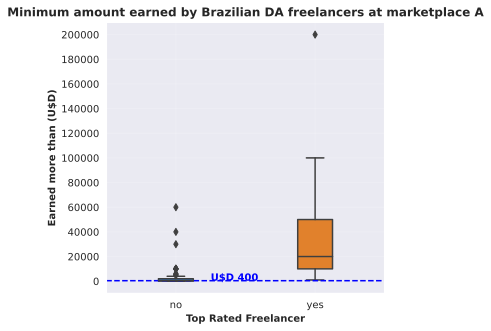

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(5,5))
sns.boxplot(x='Top_rated', y = 'Amount_earned', width=0.25, data = dataset)
plt.axhline(400,ls='dashed',color='b')
plt.text(0.25,400, 'U$D 400', color = 'b', weight='bold')
plt.title('Minimum amount earned by Brazilian DA freelancers at marketplace A', weight='bold')
plt.xlabel('Top Rated Freelancer', weight='bold')
plt.ylabel('Earned more than (U$D)', weight='bold')
#plt.yticks([])
plt.yticks(np.arange(0, 220000, 20000));
plt.grid(alpha=0.20)

In [ ]:
top_rated['Amount_earned'].max() / non_top_rated['Amount_earned'].max()

3.3333333333333335

In [ ]:
50000/2000

25.0

> **A non-top-rated DA freelancer can earn U$D 400**

> **A top-rated DA freelancer can earn U$D 20,000**

> **A top-rated DA freelancer can earn 3 folds more than a non-top-rated one**

> **About 75% of top-rated DA earn 25 folds more than non-top-rated one**

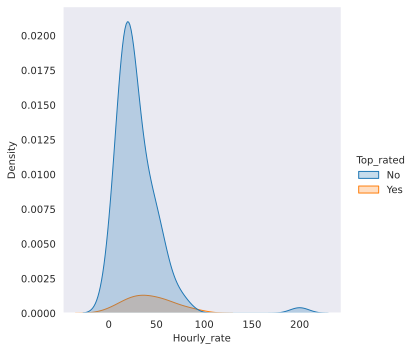

In [ ]:
sns.displot(dataset, x="Hourly_rate", hue = 'Top_rated', kind="kde", fill=True)
plt

In [ ]:
dataset['Hourly_rate'].describe()

count    101.000000
mean      30.888614
std       24.654778
min        3.000000
25%       18.000000
50%       20.000000
75%       40.000000
max      200.000000
Name: Hourly_rate, dtype: float64

In [ ]:
dataset.groupby('Top_rated')[['Hourly_rate']].describe()

Hourly_rate                                                     
                count       mean        std   min   25%   50%   75%    max
Top_rated                                                                 
no               92.0  29.725543  24.603143   3.0  16.0  20.0  40.0  200.0
yes               9.0  42.777778  23.199018  10.0  30.0  35.0  60.0   85.0

> **The maximum Hourly Rate ot Top rated freelancers are 57.5% lower than non-top-rated ones, which might means that top-rated freelancers outlier recepits are due business scaling**

In [ ]:
1 - 85/200

0.575

In [ ]:
dataset['Top_rated'] = dataset['Top_rated'].apply(lambda x: x.replace('yes','Yes'))
dataset['Top_rated'] = dataset['Top_rated'].apply(lambda x: x.replace('no','No'))

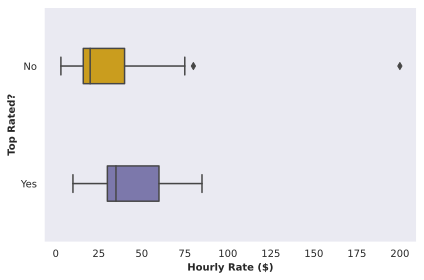

In [ ]:
sns.set_style('dark')
sns.boxplot(x='Hourly_rate', y='Top_rated', data=dataset, width=0.3, palette='Dark2_r')
plt.xlabel('Hourly Rate ($)', weight='bold')
plt.ylabel('Top Rated?', weight='bold')
plt.tight_layout()
plt.savefig('Boxplot_HR.png', dpi=600)

**4. How many are top rated freelancers?**

9 Top Rated x 92 Non Top Rated
Top rated correspond to **8.91% of Brazilian DAs**

In [ ]:
9/101*100

8.91089108910891

**Based on Hourly Rates outliers, being a Top-Rated DA freelancer does not depending on experience**

**5. What is the level of satisfaction of Brazilian DAs in the marketplace?**

There is no sufficient data to answer this question. However, is possible to the impact of being a Top Rated Data Analyst.

In [ ]:
dataset_copy = dataset.copy()
dataset_copy['Top_rated'] = dataset_copy['Top_rated'].apply(lambda valor: 1 if valor == 'yes' else 0)
dataset_copy['Hourly_rate'] = dataset_copy['Hourly_rate'].apply(lambda valor: (valor-dataset_copy['Hourly_rate'].mean())/dataset_copy['Hourly_rate'].std())
dataset_copy['Amount_earned'] = dataset_copy['Amount_earned'].apply(lambda valor: (valor-dataset_copy['Amount_earned'].mean())/dataset_copy['Amount_earned'].std())

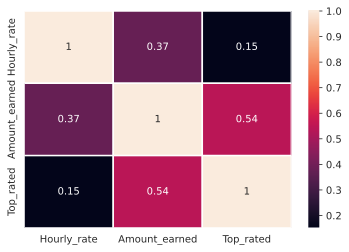

In [ ]:
sns.heatmap(dataset_copy.corr(), annot=True, ec='w', lw=1.5)

In [ ]:
dataset.to_excel('Processed_data.xlsx', index=False)